In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import string
import nltk

In [2]:
# load data
df = pd.read_csv("/Users/henryasiamah/Desktop/work/cleaned.csv")
df.head()

,Date,Headline,Content,Source,Country/Organization,cleaned_corpus
0,2024-06-07,www.bbc.com,How many people cross the Channel in small boa...,BBC,UK,How many people cross the Channel in small boa...
1,2024-06-07,www.bbc.com,Far right eyes Europe vote surge and ditches G...,BBC,UK,Far right eyes Europe vote surge and ditches G...
2,2024-06-07,www.bbc.com,Greek court throws out shipwreck trial against...,BBC,UK,Greek court throws out shipwreck trial against...
3,2024-06-07,www.bbc.com,Migrants cross Channel for 10th consecutive da...,BBC,UK,Migrants cross Channel for 10th consecutive da...
4,2024-06-07,www.bbc.com,More than 700 people arrive by small boats in ...,BBC,UK,More than 700 people arrive by small boats in ...


<Axes: xlabel='Source'>

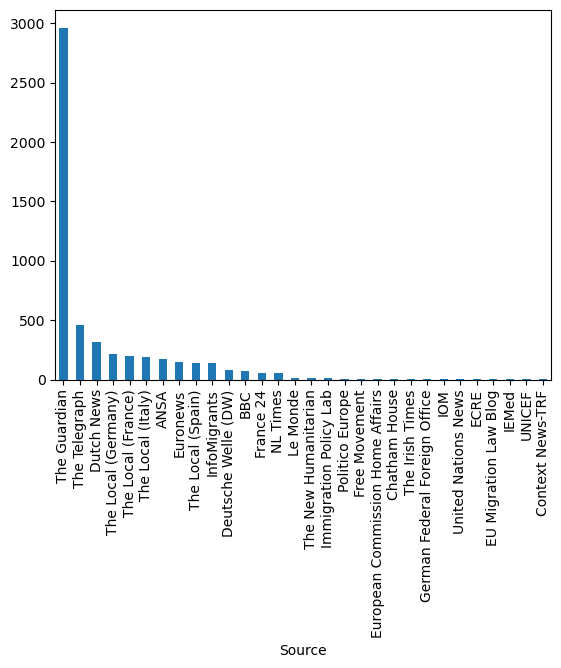

In [3]:
df['Source'].value_counts().plot(kind='bar')

In [4]:
df.Source.value_counts()

Source
The Guardian                        2963
The Telegraph                        456
Dutch News                           316
The Local (Germany)                  214
The Local (France)                   201
The Local (Italy)                    190
ANSA                                 175
Euronews                             151
The Local (Spain)                    143
InfoMigrants                         140
Deutsche Welle (DW)                   83
BBC                                   74
France 24                             58
NL Times                              56
Le Monde                              14
The New Humanitarian                  11
Immigration Policy Lab                11
Politico Europe                        9
Free Movement                          6
European Commission Home Affairs       3
Chatham House                          3
The Irish Times                        3
German Federal Foreign Office          2
IOM                                    1
United Na

In [5]:
df['categories'] = df['Source'].apply(lambda x: 'The Guardian' if x == 'The Guardian' else 'Others')

In [6]:
df.categories.value_counts()

categories
The Guardian    2963
Others          2326
Name: count, dtype: int64

<Axes: xlabel='categories'>

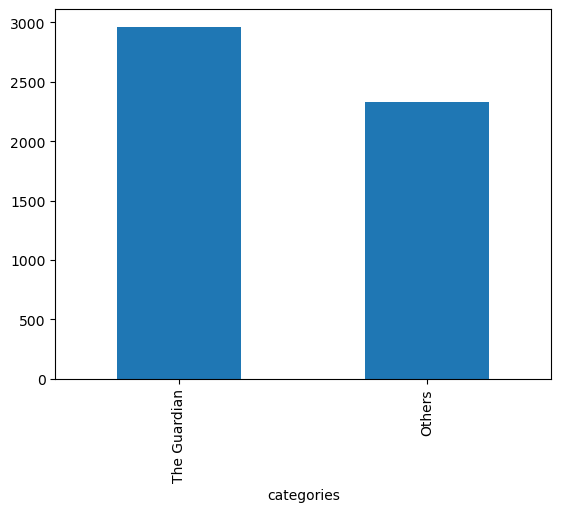

In [7]:
df.categories.value_counts().plot(kind='bar')

/var/folders/p8/733n06nx7bd3_rxwf0gydk_w0000gn/T/ipykernel_2973/2677865465.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = get_cmap('Blues')(0.8)


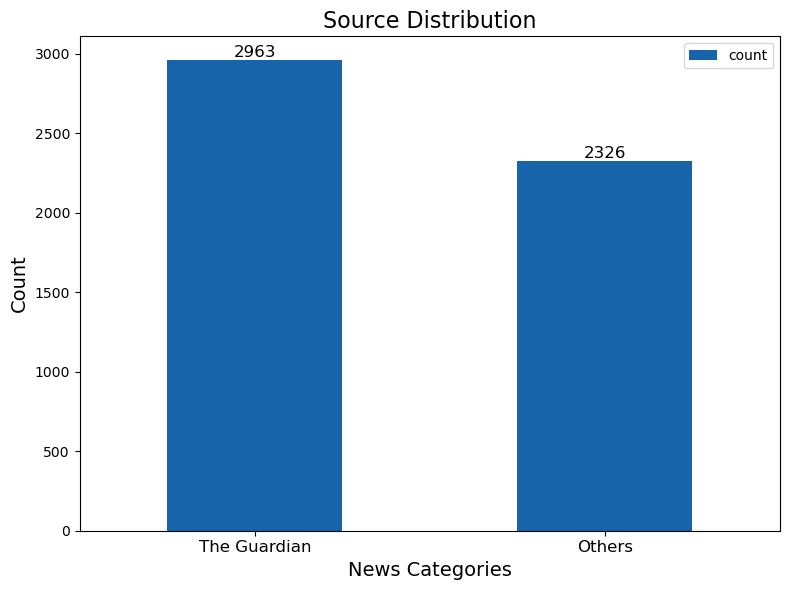

In [9]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Group the data for plotting
counts = df['categories'].value_counts()

# Set the color using the Blues colormap
color = get_cmap('Blues')(0.8)

# Plot a bar chart
plt.figure(figsize=(8, 6))
ax = counts.plot(kind='bar', color=color, legend=True)

# Add data labels
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

# Customize the chart
plt.title("Source Distribution", fontsize=16)
plt.xlabel("News Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# Save and show the plot
plt.savefig("/Users/henryasiamah/Desktop/Visuals/news_article_distribution.png")
plt.show()
plt.close()

In [13]:
missing_rows = df[df['cleaned_corpus'].isnull()]
print(missing_rows)

          Date         Headline Content              Source  \
82  2024-10-09  www.thelocal.fr     NaN  The Local (France)   

   Country/Organization cleaned_corpus categories  
82               France            NaN     Others  


In [14]:
df = df.dropna(subset=['cleaned_corpus'])

In [15]:
# checking for missing values
missing_values = df.isnull().sum()

# Print the columns with missing values and their counts
print("Columns with missing values")
print(missing_values[missing_values > 0])

# If no missing values, confirm it
if missing_values.sum() ==0:
    print("No missing values in the DataFrame.")

Columns with missing values
Series([], dtype: int64)
No missing values in the DataFrame.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/henryasiamah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/henryasiamah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/henryasiamah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/henryasiamah/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


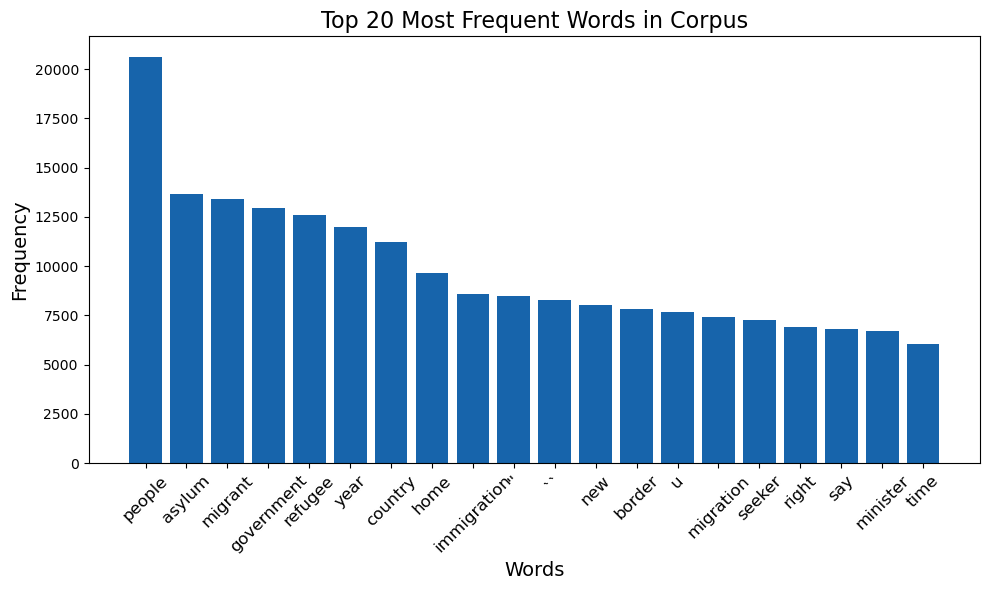

In [21]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {"like", "say", "told", "make", "would", "want", "said", "also", "one", "u", "uk"}
    stop_words.update(custom_stop_words)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

# Preprocess the corpus
df['processed_tokens'] = df['cleaned_corpus'].apply(preprocess_text)

# Flatten the list of tokens to create a single list for the corpus
all_tokens = [token for tokens in df['processed_tokens'] for token in tokens]

# Get the frequency distribution of words
word_freq = Counter(all_tokens)

# Get the 20 most common words
most_common_words = word_freq.most_common(20)

# Prepare data for plotting
words, frequencies = zip(*most_common_words)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color=color)
plt.title('Top 20 Most Frequent Words in Corpus', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()